In [3]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [4]:
#load data
data = pd.read_csv("..\..\..\Data\Day\S&P 500 Historical Data00-20Linear.csv")

In [5]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-01-03,1455.2,1469.2,1478.0,1438.4,NaN,-0.95%
1,2000-01-04,1399.4,1455.2,1455.2,1397.4,NaN,-3.83%
2,2000-01-05,1402.1,1399.4,1413.3,1377.7,NaN,0.19%
3,2000-01-06,1403.5,1402.1,1411.9,1392.0,NaN,0.10%
4,2000-01-07,1441.5,1403.5,1441.5,1400.5,NaN,2.71%


In [7]:
#transform data
data = data.replace(",", "", regex=True)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.set_index('Date')
data.Price = data.Price.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)
data["Vol."] = data["Vol."].astype(float)

In [8]:
special_data = pd.DataFrame(data)

In [9]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [10]:
#change indexes
special_data.set_index('Date', inplace = True)

In [11]:
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Timestamp
0,2000-01-03,1455.200000,1469.200000,1478.000000,1438.400000,NaN,-0.95%,2000-01-03
1,2000-01-04,1399.400000,1455.200000,1455.200000,1397.400000,NaN,-3.83%,2000-01-04
2,2000-01-05,1402.100000,1399.400000,1413.300000,1377.700000,NaN,0.19%,2000-01-05
3,2000-01-06,1403.500000,1402.100000,1411.900000,1392.000000,NaN,0.10%,2000-01-06
4,2000-01-07,1441.500000,1403.500000,1441.500000,1400.500000,NaN,2.71%,2000-01-07
5,2000-01-08,1446.866667,1416.166667,1449.133333,1414.166667,NaN,NaN,2000-01-08
6,2000-01-09,1452.233333,1428.833333,1456.766667,1427.833333,NaN,NaN,2000-01-09
7,2000-01-10,1457.600000,1441.500000,1464.400000,1441.500000,NaN,1.12%,2000-01-10
8,2000-01-11,1438.600000,1457.600000,1458.800000,1434.400000,NaN,-1.30%,2000-01-11
9,2000-01-12,1432.200000,1439.100000,1445.300000,1427.300000,NaN,-0.44%,2000-01-12


In [12]:
special_data.head(10)

,Price,Open,High,Low,Vol.,Change %,Timestamp
Date,,,,,,,
2010-01-02,1124.045000,1121.580000,1130.7550,1115.685000,NaN,NaN,2010-01-02
2010-01-03,1128.517500,1119.070000,1132.3125,1116.122500,NaN,NaN,2010-01-03
2010-01-04,1132.990000,1116.560000,1133.8700,1116.560000,NaN,1.60%,2010-01-04
2010-01-05,1136.520000,1132.660000,1136.6300,1129.660000,NaN,0.31%,2010-01-05
2010-01-06,1137.140000,1135.710000,1139.1900,1133.950000,NaN,0.05%,2010-01-06
2010-01-07,1141.690000,1136.270000,1142.4600,1131.320000,NaN,0.40%,2010-01-07
2010-01-08,1144.980000,1140.520000,1145.3900,1136.220000,NaN,0.29%,2010-01-08
2010-01-09,1145.646667,1142.333333,1146.8400,1138.153333,NaN,NaN,2010-01-09
2010-01-10,1146.313333,1144.146667,1148.2900,1140.086667,NaN,NaN,2010-01-10


In [13]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Vol.,Change %,Timestamp,new_index,new_date
Date,,,,,,,,,
2010-01-02,1124.0450,1121.58,1130.7550,1115.6850,NaN,NaN,2010-01-02,1124.0450,1124.0450
2010-01-03,1128.5175,1119.07,1132.3125,1116.1225,NaN,NaN,2010-01-03,1128.5175,1128.5175
2010-01-04,1132.9900,1116.56,1133.8700,1116.5600,NaN,1.60%,2010-01-04,1132.9900,1132.9900
2010-01-05,1136.5200,1132.66,1136.6300,1129.6600,NaN,0.31%,2010-01-05,1136.5200,1136.5200
2010-01-06,1137.1400,1135.71,1139.1900,1133.9500,NaN,0.05%,2010-01-06,1137.1400,1137.1400


In [14]:
import datetime

special_data.new_index[0] = 1262563200
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [16]:
special_data.head(20)

,Price,Open,High,Low,Vol.,Change %,Timestamp,new_index
new_date,,,,,,,,
2010-01-04 07:00:00,1124.045000,1121.580000,1130.7550,1115.685000,NaN,NaN,2010-01-02,1.262563e+09
2010-01-05 07:00:00,1128.517500,1119.070000,1132.3125,1116.122500,NaN,NaN,2010-01-03,1.262650e+09
2010-01-06 07:00:00,1132.990000,1116.560000,1133.8700,1116.560000,NaN,1.60%,2010-01-04,1.262736e+09
2010-01-07 07:00:00,1136.520000,1132.660000,1136.6300,1129.660000,NaN,0.31%,2010-01-05,1.262822e+09
2010-01-08 07:00:00,1137.140000,1135.710000,1139.1900,1133.950000,NaN,0.05%,2010-01-06,1.262909e+09
2010-01-09 07:00:00,1141.690000,1136.270000,1142.4600,1131.320000,NaN,0.40%,2010-01-07,1.262995e+09
2010-01-10 07:00:00,1144.980000,1140.520000,1145.3900,1136.220000,NaN,0.29%,2010-01-08,1.263082e+09
2010-01-11 07:00:00,1145.646667,1142.333333,1146.8400,1138.153333,NaN,NaN,2010-01-09,1.263168e+09
2010-01-12 07:00:00,1146.313333,1144.146667,1148.2900,1140.086667,NaN,NaN,2010-01-10,1.263254e+09


In [17]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [18]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

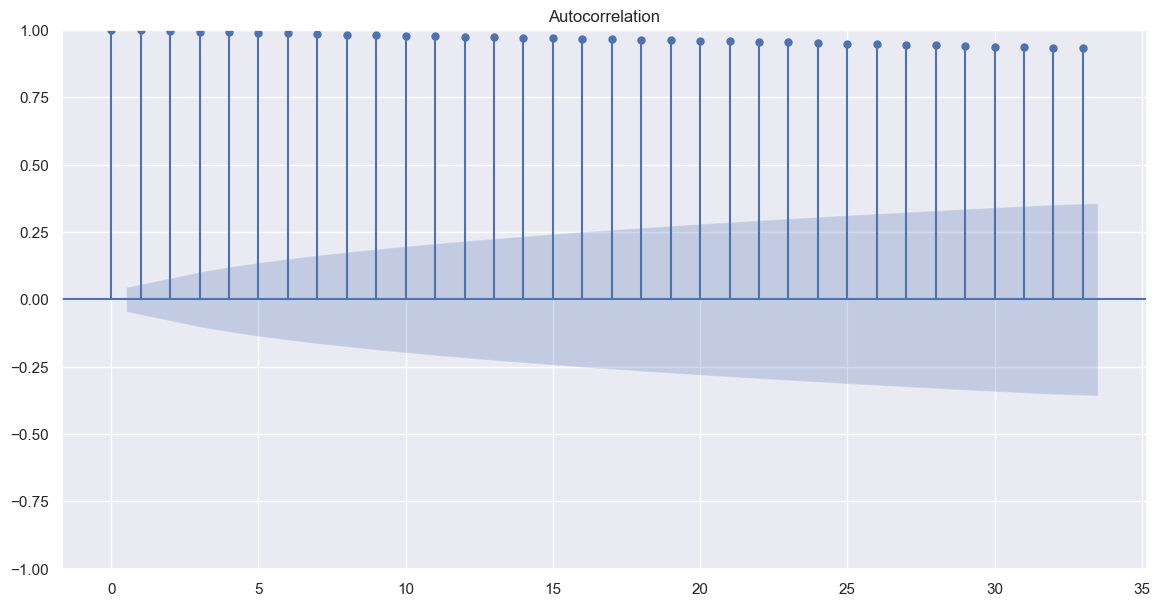

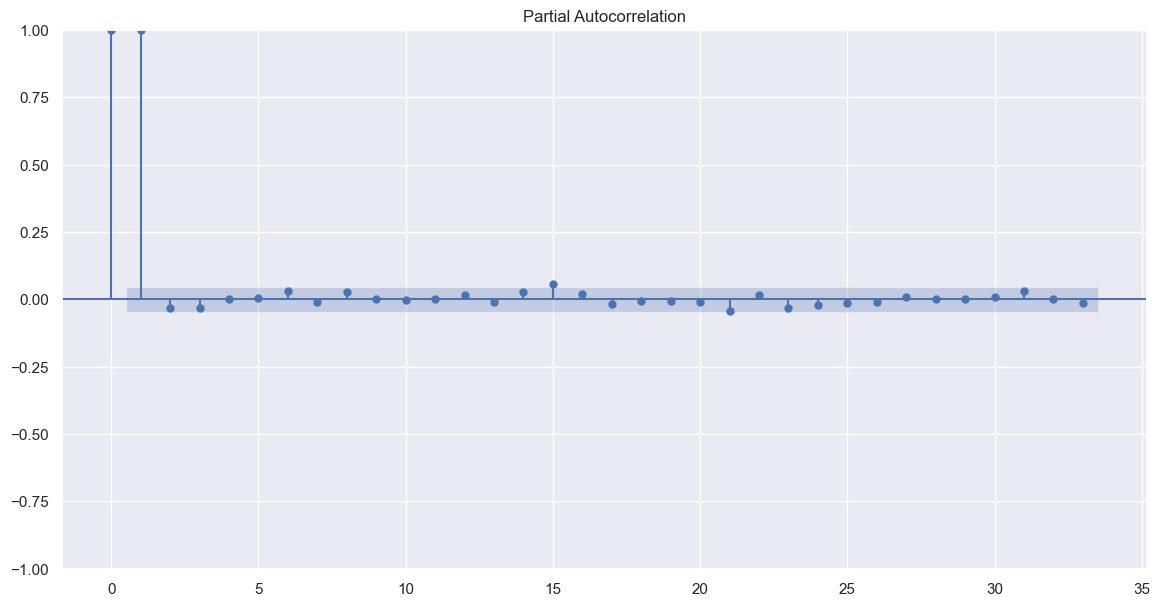

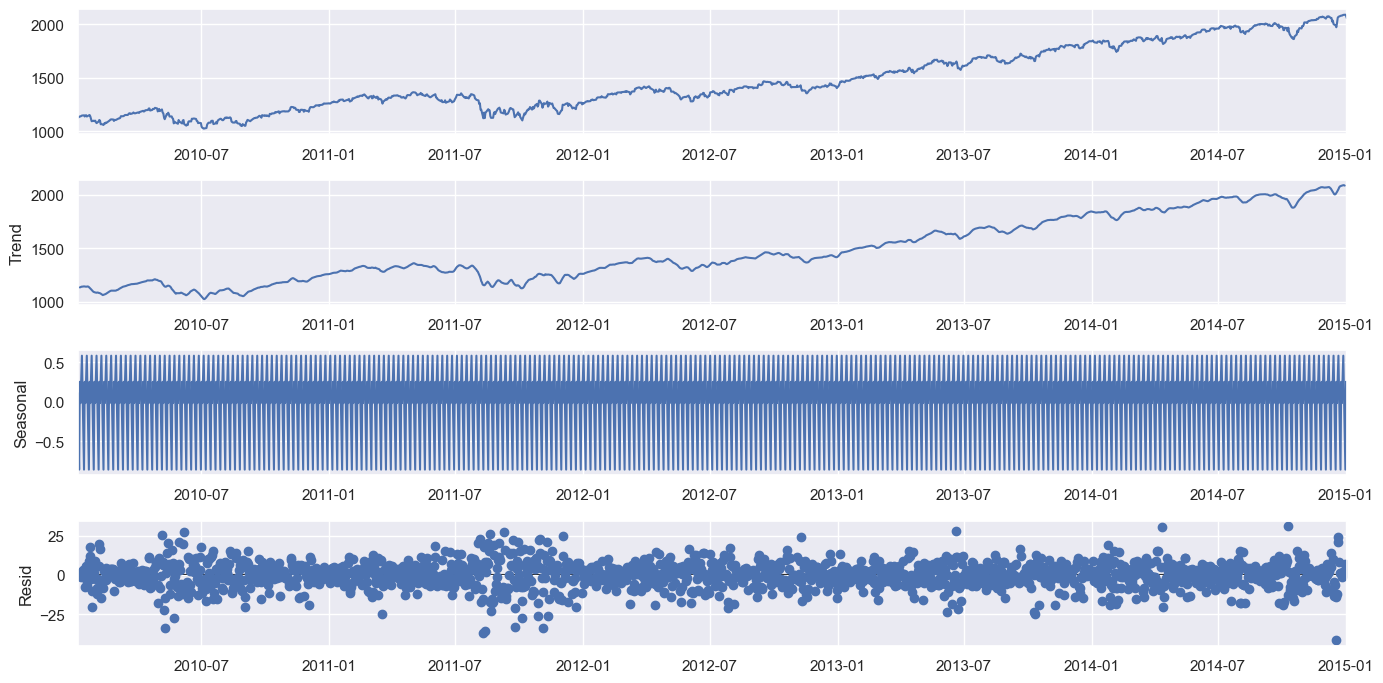

0.2521512650667742
0.9750395127722604


In [19]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

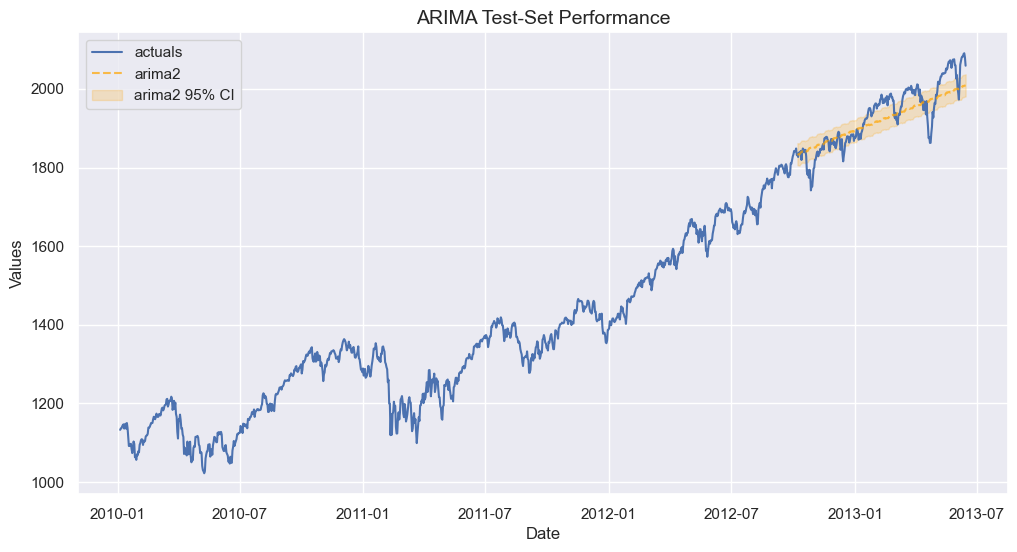

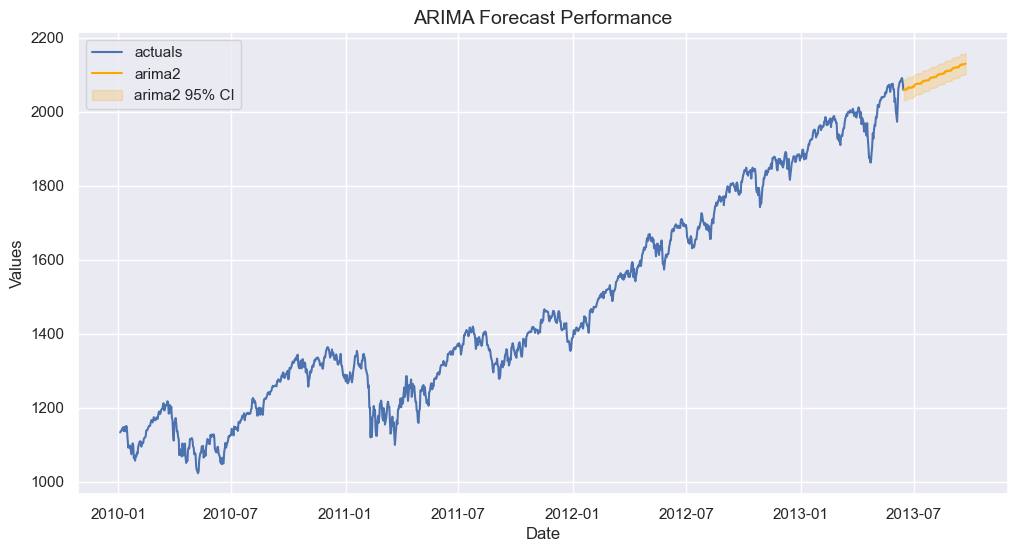

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1258
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5031.638
Date:                          Sat, 14 Oct 2023   AIC                          10077.276
Time:                                  23:38:27   BIC                          10113.164
Sample:                                       0   HQIC                         10090.770
                                         - 1258                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8177      0.098     -8.334      0.000      -1.010      -0.625
ar.L2          0.0151      0.028      0.534      0.594      -0.040       0.070
ma.L1          0.7768      0.095      8.154      0.000       0.590       0.963
ar.S.L12      -0.0140      0.026     -0.534      0.594      -0.066       0.037
ar.S.L24       0.0255      0.030      0.849      0.396      -0.033       0.084
ma.S.L12      -0.9998      0.923     -1.084      0.279      -2.808       0.808
sigma2       181.4583    166.207      1.092      0.275    -144.301     507.217
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               273.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.32
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [21]:
adf_test(special_data['Close'])

1. ADF :  0.2521512650667742
2. P-Value :  0.9750395127722604
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1809
5. Critical Values :
	 1% :  -3.4339700129534423
	 5% :  -2.8631390341376393
	 10% :  -2.567621272963846


In [22]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -6857.085
Date:                Mon, 16 Oct 2023   AIC                          13730.171
Time:                        01:21:32   BIC                          13774.241
Sample:                    01-04-2010   HQIC                         13746.428
                         - 01-02-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7748      0.401      1.931      0.054      -0.012       1.561
ar.L1         -0.5163      0.138     -3.746      0.000      -0.786      -0.246
ar.L2          0.0628      0.022      2.864      0.004       0.020       0.106
ar.L3          0.0387      0.027      1.445      0.149      -0.014       0.091
ar.L4         -0.0151      0.025     -0.597      0.551      -0.065       0.034
ar.L5         -0.0824      0.021     -3.990      0.000      -0.123      -0.042
ma.L1          0.5332      0.140      3.803      0.000       0.258       0.808
sigma2       107.8580      2.088     51.668      0.000     103.767     111.949
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1522.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.32
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
data_len = len(special_data)

In [24]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [25]:
train_data = special_data.iloc[:int(train_len)]

In [26]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [27]:
test_data.Close

new_date
2013-07-04 07:00:00    1614.080000
2013-07-05 07:00:00    1615.410000
2013-07-06 07:00:00    1623.650000
2013-07-07 07:00:00    1631.890000
2013-07-08 07:00:00    1634.746667
                          ...     
2014-12-29 07:00:00    2089.370000
2014-12-30 07:00:00    2089.970000
2014-12-31 07:00:00    2090.570000
2015-01-01 07:00:00    2080.350000
2015-01-02 07:00:00    2058.900000
Name: Close, Length: 548, dtype: float64

In [28]:
train_data

,Close,Open,High,Low,Vol.,Change %,Timestamp,new_index
new_date,,,,,,,,
2010-01-04 07:00:00,1124.045000,1121.580000,1130.755000,1115.685000,NaN,NaN,2010-01-02,1.262563e+09
2010-01-05 07:00:00,1128.517500,1119.070000,1132.312500,1116.122500,NaN,NaN,2010-01-03,1.262650e+09
2010-01-06 07:00:00,1132.990000,1116.560000,1133.870000,1116.560000,NaN,1.60%,2010-01-04,1.262736e+09
2010-01-07 07:00:00,1136.520000,1132.660000,1136.630000,1129.660000,NaN,0.31%,2010-01-05,1.262822e+09
2010-01-08 07:00:00,1137.140000,1135.710000,1139.190000,1133.950000,NaN,0.05%,2010-01-06,1.262909e+09
...,...,...,...,...,...,...,...,...
2013-06-29 07:00:00,1613.200000,1606.440000,1620.070000,1606.440000,NaN,0.62%,2013-06-27,1.372464e+09
2013-06-30 07:00:00,1606.280000,1611.120000,1615.940000,1601.060000,NaN,-0.43%,2013-06-28,1.372550e+09
2013-07-01 07:00:00,1609.173333,1610.673333,1619.496667,1603.966667,NaN,NaN,2013-06-29,1.372637e+09


In [29]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=9654.619, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=9656.284, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=9656.002, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=9657.930, Time=0.21 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=9659.653, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=9650.880, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=9656.256, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=9657.680, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=9659.919, Time=0.58 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=9655.616, Time=0.66 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=9649.946, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=9656.068, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=9658.065, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=9653.748, Time=0.36 sec
 ARIMA(2,1,3)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1277
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -4812.424
Date:                Mon, 16 Oct 2023   AIC                           9644.848
Time:                        01:22:23   BIC                           9696.362
Sample:                    01-04-2010   HQIC                          9664.194
                         - 07-03-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2930      0.278      1.055      0.291      -0.251       0.837
ar.L1         -0.3303      0.133     -2.483      0.013      -0.591      -0.070
ar.L2          0.1058      0.145      0.729      0.466      -0.179       0.390
ar.L3          0.6362      0.125      5.107      0.000       0.392       0.880
ar.L4         -0.0493      0.023     -2.130      0.033      -0.095      -0.004
ar.L5         -0.1263      0.022     -5.671      0.000      -0.170      -0.083
ma.L1          0.3489      0.133      2.622      0.009       0.088       0.610
ma.L2         -0.0563      0.148     -0.380      0.704      -0.347       0.234
ma.L3         -0.6256      0.122     -5.145      0.000      -0.864      -0.387
sigma2       110.4791      2.602     42.461      0.000     105.379     115.579
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1230.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.52
Prob(H) (two-sided):                  0.35   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

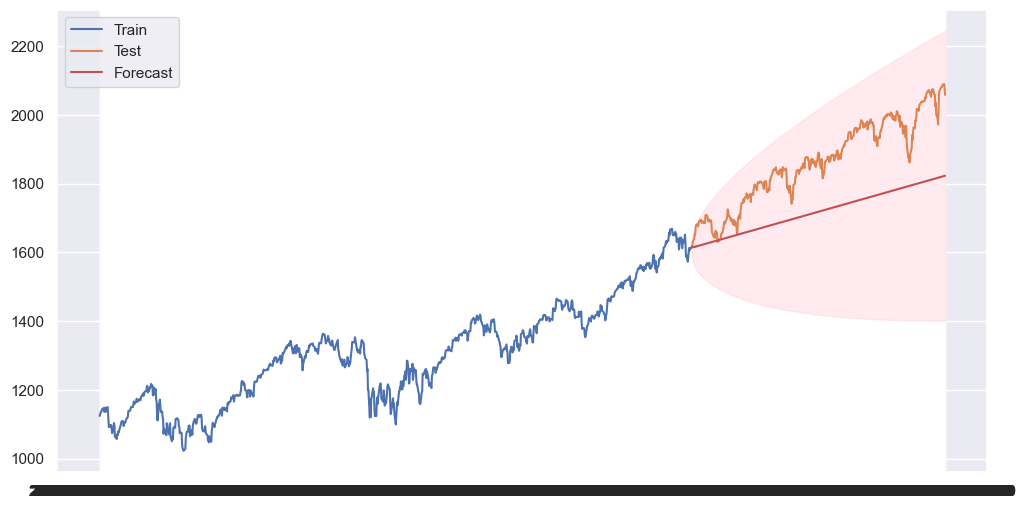

In [30]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()